# Explores ICD9 ontology and MIMIC data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import time
import threading
import datetime
import multiprocessing as mp
from multiprocessing import Process, Manager
from itertools import repeat
import multiprocessing as mp
import os
import pprint
from magictree import * #tree layout

In [2]:
raw = pd.read_csv('ICD9CM.csv')
mimic = sorted(np.load('mimic_sequences.npy'))

In [3]:
icd9_G=nx.DiGraph()
icd9_G.add_edge('ROOT','owl#Thing')
for indx,row in list(raw.iterrows()):
    son = row['Class ID'].split('/')[-1]
    dad = row['Parents'].split('/')[-1] if isinstance(row['Parents'], str) else 'ROOT'
    icd9_G.add_edge(dad,son)
icd9_G.add_edge('719.7','719.70')

In [4]:
mimic_leaves = sorted(list(set([a for b in [c for d in mimic for c in d] for a in b])))

mimic_nodes = []
for l in mimic_leaves:
    mimic_nodes+=nx.shortest_path(icd9_G,'ROOT',l)
mimic_nodes = sorted(list(set(mimic_nodes)))

#FATHER->SON
mimic_G=nx.DiGraph()
for son in mimic_nodes:
    if son=='ROOT':
        continue
    dad = list(icd9_G.in_edges(son))[0][0]
    mimic_G.add_edge(dad,son)

In [6]:
def plot_graph(some_graph,some_depth,colorlist=[],use_labels=False):
    testG = nx.DiGraph()
    old_list = ['ROOT']
    for depth in range(some_depth):
        new_list = []
        for dad in old_list:
            for k in [x[1] for x in list(some_graph.out_edges(dad))]:
                new_list.append(k)
                testG.add_edge(dad,k)
        old_list = new_list
    plt.figure(figsize=(20,some_depth*2))
    pos = hierarchy_pos(testG,'ROOT')    
    nx.draw_networkx_nodes(testG,pos=pos,node_size=1,with_labels=use_labels,node_color='k')
    for l,c in colorlist:
        nx.draw_networkx_nodes(testG, pos=pos,node_size=20,nodelist=l,node_color=c)
    nx.draw_networkx_edges(testG, pos=pos,width=.25,alpha=0.5)  

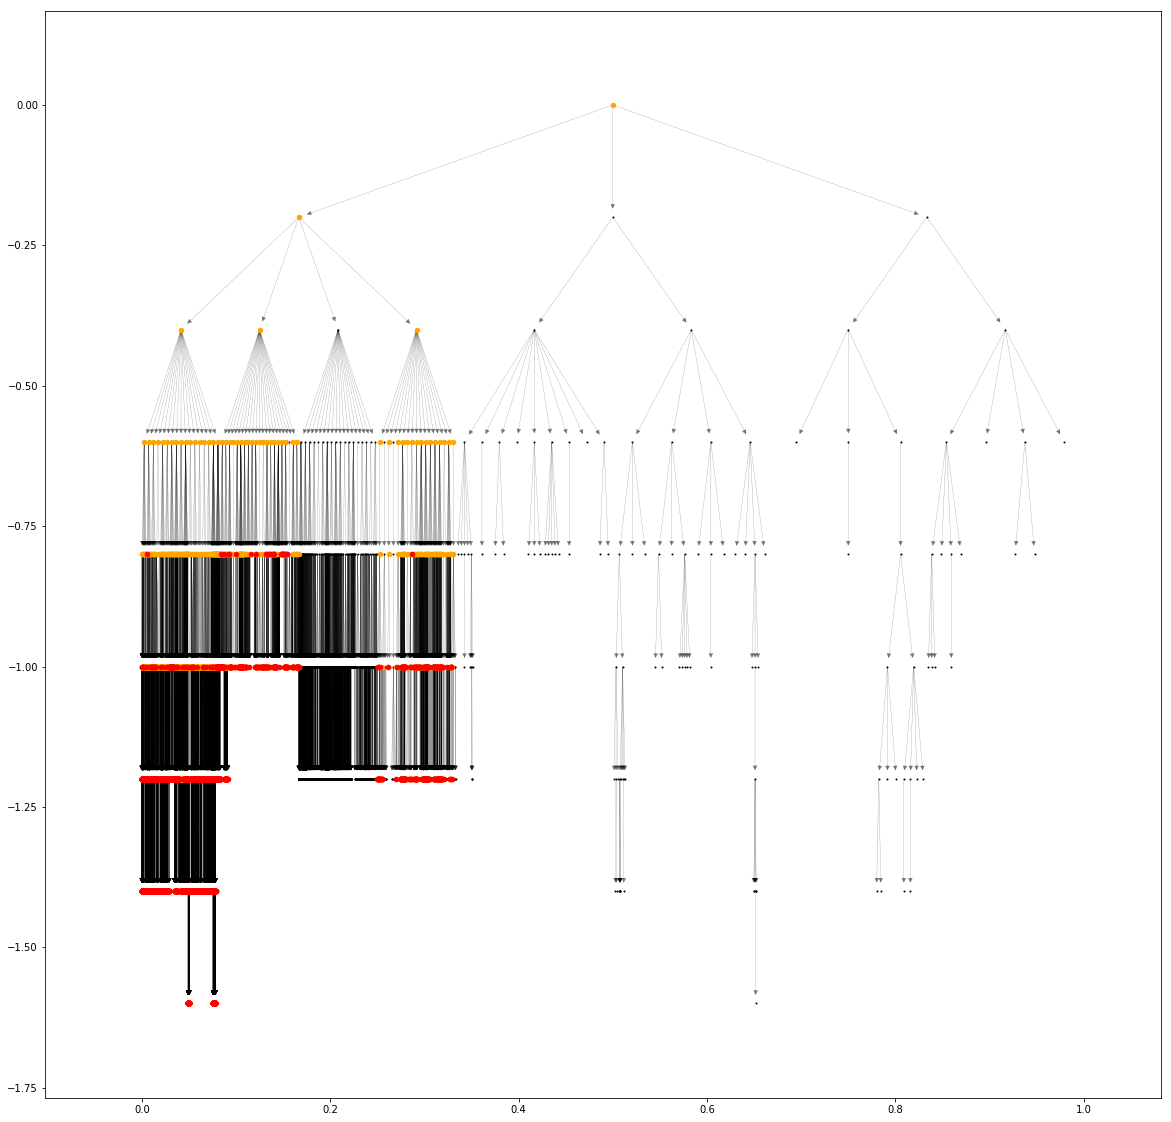

In [7]:
plot_graph(icd9_G,10,[(mimic_nodes,'orange'),(mimic_leaves,'r')],use_labels=True)